# Analysis of Supermarket data.

This notebook analyzes the dataset and groups profit data by Product Lines to see what product type is affecting the company in a negative way. If the products are not selling, the company can audit the product line to see what products should no longer be sold.

# **Import Libraries**

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **EDA Of SuperMarket Data**
___________________________________________________________________________________________

In [5]:
#Supermarket Analysis
data = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

#Name of columns
data.columns

print("Dataset Shape:", data.shape)
print("\nColumn Data Types:\n", data.dtypes)

data.head()


Dataset Shape: (1000, 17)

Column Data Types:
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Review shopping values:

In [6]:
#Dont worry about payment type

#Check for missing Shopping values
missing_values = data.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [7]:
#data.sample(10)
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
# Drop unnecessary columns if any
data.drop(columns=['Payment','gross margin percentage','Invoice ID','Time'], inplace=True)
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,604.17,30.2085,5.3


# Convert categorical data to numerical data:

In [9]:
#FIXING DATA 
#Covert categorical data to numerical
data['Gender'] = data['Gender'].map({'Female':0,'Male':1})

data['Branch'] = data['Branch'].map({'A':0, 'B':1,'C':2})

data['City'] = data['City'].map({'Naypyitaw':0,'Yangon':1, 'Mandalay':2, })

data['Customer type'] = data['Customer type'].map({'Normal':0,'Member':1})

data['Product line'] = data['Product line'].map({'Health and beauty':0,'Electronic accessories':1, 'Fashion accessories':2, 'Home and lifestyle':3,'Sports and travel':4 ,'Food and beverages':5})

data['Cost'] = data['Unit price'] * data['Quantity']
data['Profit margin']= data['Total']- data['Cost']

# Visualation of the Data:

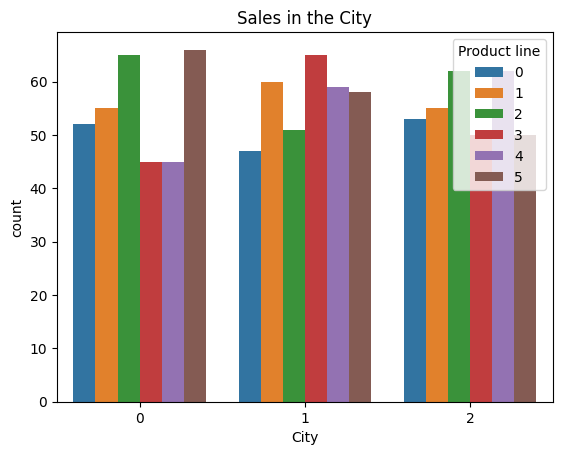

In [10]:
#Visualize Sales by City
sns.countplot(x='City', hue='Product line', data=data)
plt.title("Sales in the City")
plt.show()

#PRODUCT LINE
#'Health and beauty':0
#'Electronic accessories':1
#'Fashion accessories':2
#'Home and lifestyle':3
#'Sports and travel':4 
#'Food and beverages':5

#CITY
#'Naypyitaw':0
#'Yangon':1
#'Mandalay':2, 

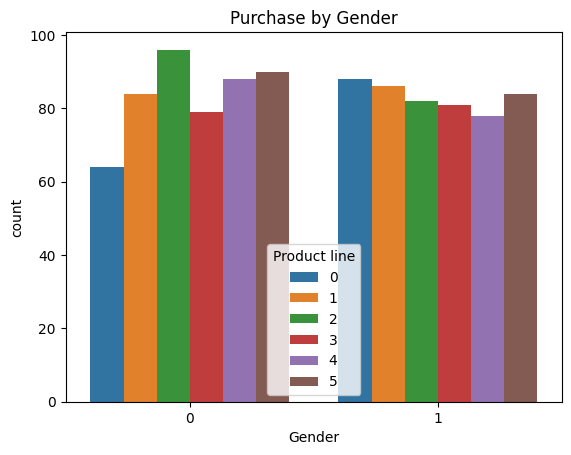

In [11]:
# Visualize the Product Line by Gender
sns.countplot(x='Gender', hue='Product line', data= data)
plt.title('Purchase by Gender')
plt.show()

#PRODUCT LINE
#'Health and beauty':0
#'Electronic accessories':1
#'Fashion accessories':2
#'Home and lifestyle':3
#'Sports and travel':4 
#'Food and beverages':5

#GENDER
#'Female':0
#'Male':1

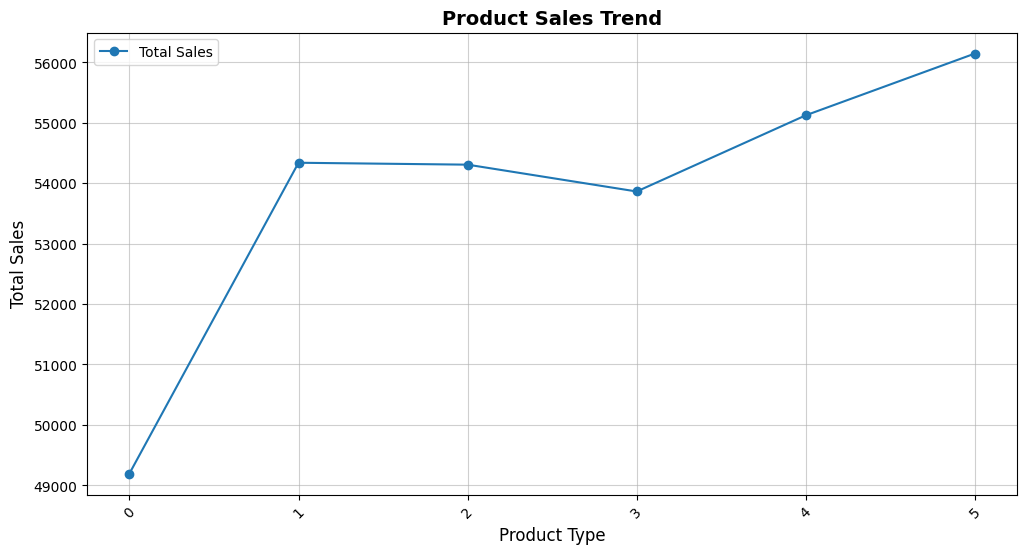

In [ ]:
# Visualize the Product line by Total sales
date_sales = data.groupby('Product line')['Total'].sum()
plt.figure(figsize =(12,6))
date_sales.plot(kind='line', marker='o')

#Add labels and title
plt.title("Product Sales Trend", fontsize=14, fontweight='bold')
plt.xlabel("Product Type",fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)

#Add grid and legend
plt.grid(True, linestyle='-', alpha=0.6)
plt.legend(['Total Sales'])
plt.show()

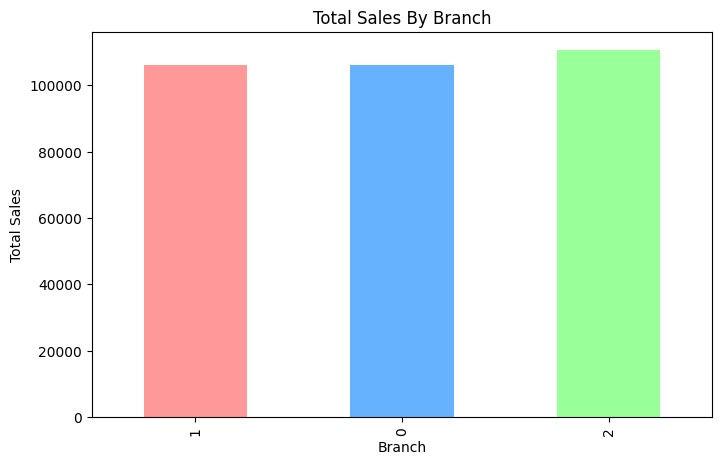

In [ ]:
# Visualize Total sales by Branch
branch_sales = data.groupby('Branch')['Total'].sum().sort_values()

plt.figure(figsize = (8,5))
branch_sales.plot(kind='bar', color =['#FF9999','#66B2FF','#99FF99'])
plt.title("Total Sales By Branch")
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()



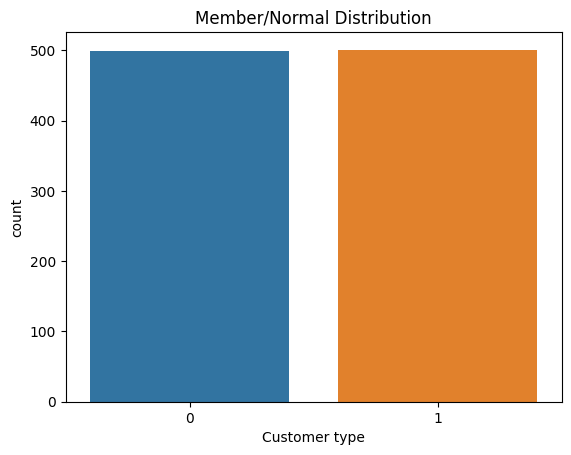

In [14]:
#distribution of Members vs Non Members
sns.countplot(x='Customer type', data=data)
plt.title('Member/Normal Distribution')
plt.show()



___________________________________________________________________________________________

# **Correlation Matrix**

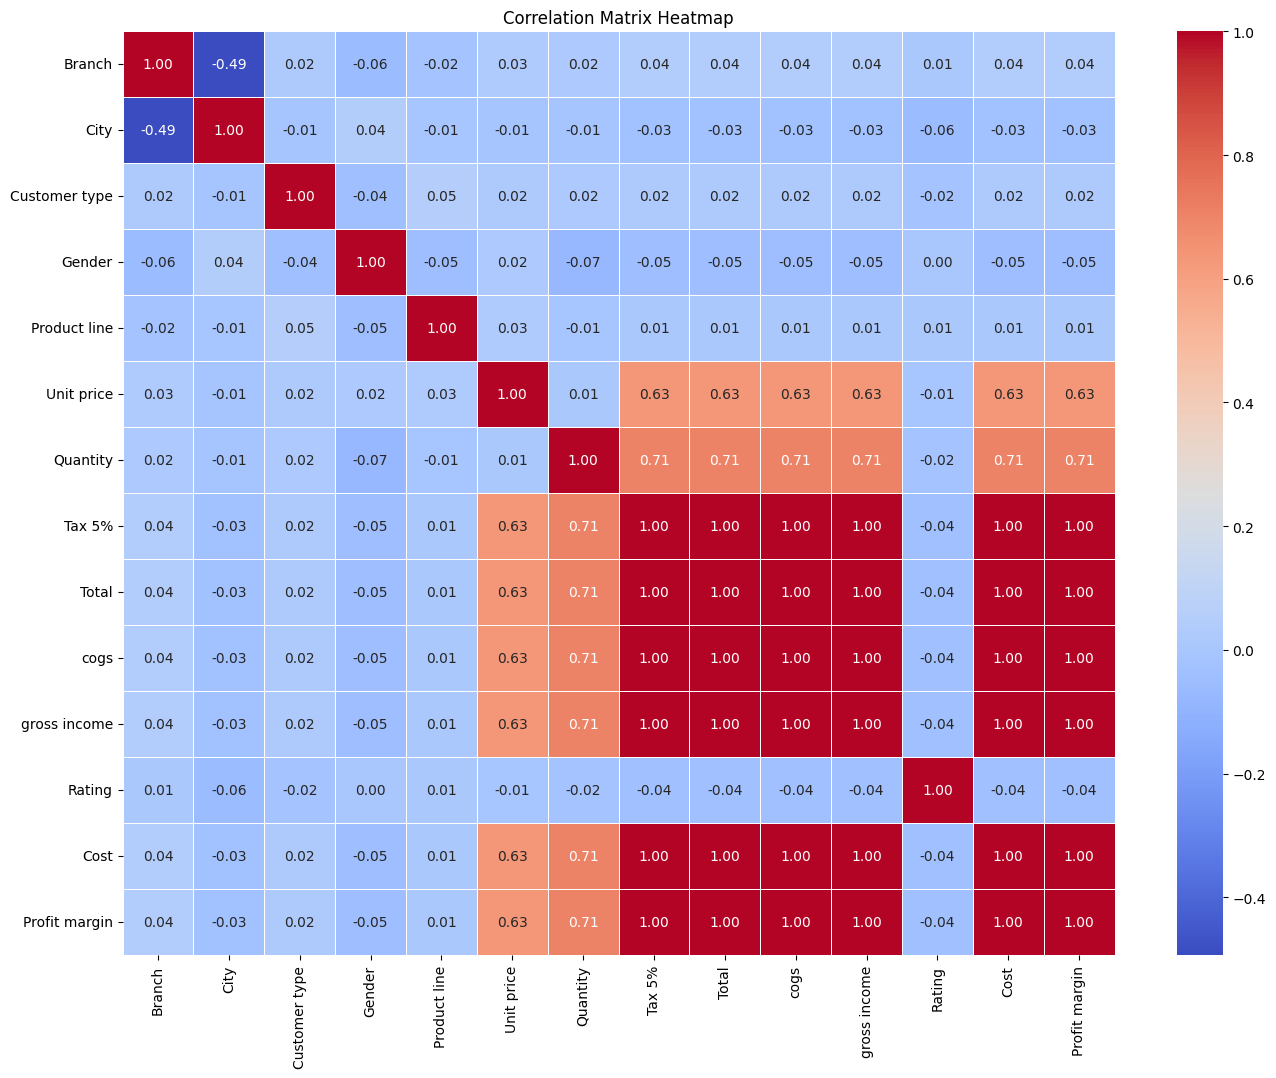

In [15]:
# Compute correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Grouping Features with Numerical Values:

In [ ]:

# Separate numerical and categorical columns
numerical_features = data.select_dtypes(include=['float64', 'int64'])
#categorical_features = data.select_dtypes(include=['object'])

#print(numerical_features.head())
col_to_drop = ["Customer type","gross income","Tax 5%","Gender","cogs","Rating","Unit price","Branch", "City"]
numerical_features = numerical_features.drop(col_to_drop,axis=1)
numerical_features.describe()

 

,Product line,Quantity,Total,Cost,Profit margin
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.540000,5.510000,322.966749,307.58738,15.379369
std,1.696844,2.923431,245.885335,234.17651,11.708825
min,0.000000,1.000000,10.678500,10.17000,0.508500
25%,1.000000,3.000000,124.422375,118.49750,5.924875
50%,2.500000,5.000000,253.848000,241.76000,12.088000
75%,4.000000,8.000000,471.350250,448.90500,22.445250
max,5.000000,10.000000,1042.650000,993.00000,49.650000



# **KMeans Clustering:**

In [17]:
#KMeans Clustering of Product Lines
# Preprocess Data
scaler = StandardScaler()
X = scaler.fit_transform(data[['Product line','Quantity', 'Total','Cost','Profit margin']])

# Function to apply K-Means clustering and plot results
def plot_kmeans(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_kmeans = kmeans.fit_predict(X)
    
    # Create scatter plot
    fig = px.scatter(
        x=X[:, 1], y=X[:, 2], color=y_kmeans.astype(str), title=f"K-Means Clustering with K={k}",
        labels={"x": "Quantity", "y": "Total"}
    )
    
    # Add cluster centroids
    fig.add_trace(go.Scatter(
        x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 2],
        mode='markers', marker=dict(color='red', size=12, symbol='x'),
        name='Centroids'
    ))
    
    fig.show()

# Create interactive slider
k_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='K:')
widgets.interactive(plot_kmeans, k=k_slider)

#'Health and beauty':0
#'Electronic accessories':1
#'Fashion accessories':2
#'Home and lifestyle':3
#'Sports and travel':4 
#'Food and beverages':5


interactive(children=(IntSlider(value=3, description='K:', max=10, min=1), Output()), _dom_classes=('widget-in…

In [18]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Evaluate with Silhouette Score
silhouette = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette:.2f}")

Silhouette Score: 0.31


KMeans ARI: 0.17


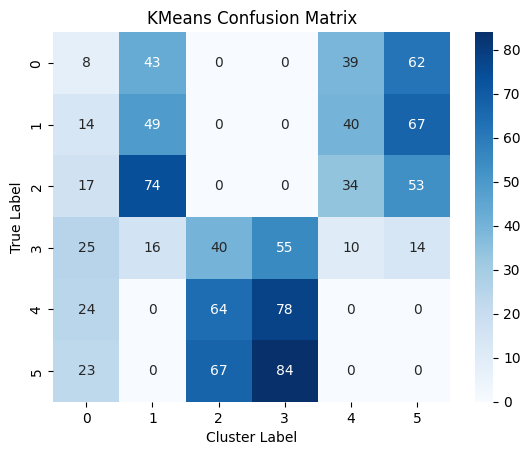

In [19]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix

true_label = data['Product line']

kmeans_ari = adjusted_rand_score(true_label, y_kmeans)

print(f"KMeans ARI: {kmeans_ari:.2f}")

# Confusion matrix (example for KMeans)
cm = confusion_matrix(true_label, y_kmeans)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KMeans Confusion Matrix")
plt.xlabel("Cluster Label")
plt.ylabel("True Label")
plt.show()


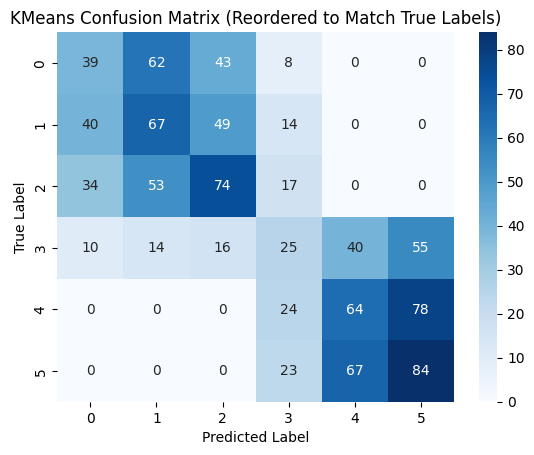

In [20]:
from scipy.optimize import linear_sum_assignment

def match_labels(true_labels, pred_labels):
    # Create the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    
    # Use Hungarian Algorithm to find the best assignment
    row_ind, col_ind = linear_sum_assignment(-cm)  # Maximize total accuracy
    
    # Create mapping from predicted label to true label
    label_mapping = {pred_label: true_label for pred_label, true_label in zip(col_ind, row_ind)}
    
    # Apply mapping to predictions
    new_pred_labels = np.array([label_mapping[label] for label in pred_labels])
    return new_pred_labels, cm[:, col_ind]

# Example usage
matched_labels, reordered_cm = match_labels(true_label, y_kmeans)

# Plot the reordered confusion matrix
sns.heatmap(reordered_cm, annot=True, fmt='d', cmap='Blues')
plt.title("KMeans Confusion Matrix (Reordered to Match True Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Conclusion:**

Clustering the data based on Product lines, there are 6 values. With k=6, the Product line with the least quantity and total amount is in Electronic accessories. The highest quantity and total amount is in Food and beverages. If the company wishes to evaluate loses overall, the Electronic accessories would need to be reviewed to see what products could be discontinued within the store or less quantities could be ordered to keep up with sales without creating a bigger profit loss.